<a href="https://colab.research.google.com/github/Nischal957905/Ai_Face_Attendance/blob/main/AttendanceFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import pandas as pd
import cv2, os, pickle
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,MaxPooling2D,Dropout,Conv2D

In [127]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
stored_data_path = '/content/drive/MyDrive/AttendanceModel'
pictures_path = os.path.join(stored_data_path, 'data')
pictures_paths = '/content/drive/MyDrive/AttendanceModel/dataImage'

In [130]:
def increase_image_span(pictures_path):
    datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.3,
        brightness_range=(0.9, 1.1),
        cval=255,
        rescale=1 / 255.0,
        rotation_range=30,
        width_shift_range=0.07,
        height_shift_range=0.07,
        horizontal_flip=True,
        fill_mode="reflect"
    )

    incrementerIndex = 0

    for person_folder in os.listdir(pictures_path):
        person_folder_path = os.path.join(pictures_path, person_folder)
        if os.path.isdir(person_folder_path):
            for l in os.listdir(person_folder_path):
                img_name = l.split("$")[0]
                keepImg = load_img(os.path.join(person_folder_path, l))
                formImg = img_to_array(keepImg)
                formImg = formImg.reshape((1, ) + formImg.shape)
                keepInc = 0


                for eachIteration in datagen.flow(formImg, batch_size=1, save_to_dir=pictures_paths, save_prefix=f'{person_folder}${keepInc}', save_format='jpeg'):
                    keepInc += 1
                    if keepInc > 200:
                        break

                incrementerIndex += 1
                print(f"{incrementerIndex} has been precessed")


In [4]:
increase_image_span(pictures_path)

NameError: ignored

In [131]:
def to_transfer_lab():

    for iterMap in os.listdir(pictures_paths):
      arr_extens = ('.jpg', '.jpeg', '.png')
      if iterMap.endswith(arr_extens):
        iterImg = cv2.imread(os.path.join(pictures_paths, iterMap))

        # Check if the image was read successfully
        if iterImg is not None:
            resized = cv2.resize(iterImg, (128, 128))
            each_iterImg.append(resized)
            if '$' in iterMap:
                new_labImg = iterMap.split("$")[0]
            else:
                new_labImg = iterMap.split(".")[0]
            each_iterLab.append(new_labImg)
        else:
            print(f"Failed to read image: {iterMap}")

each_iterImg = []
each_iterLab = []
to_transfer_lab()
each_iterImg = np.array(each_iterImg)
each_iterLab = np.array(each_iterLab)



In [132]:
each_iterImg.shape

(3782, 128, 128, 3)

In [133]:
each_iterLab

array(['STCS0010', 'STCS0010', 'STCS0010', ..., 'STCS002', 'STCS002',
       'STCS002'], dtype='<U8')

In [134]:
lablEncAbler = LabelEncoder()
each_iterLab = lablEncAbler.fit_transform(each_iterLab)
each_iterLab

array([2, 2, 2, ..., 7, 7, 7])

In [135]:
tranmigateLab = lablEncAbler.inverse_transform(each_iterLab)
tranmigateLab

array(['STCS0010', 'STCS0010', 'STCS0010', ..., 'STCS002', 'STCS002',
       'STCS002'], dtype='<U8')

In [136]:
np.unique(tranmigateLab)

array(['Nischal', 'STCS001', 'STCS0010', 'STCS0011', 'STCS0012',
       'STCS0013', 'STCS0014', 'STCS002', 'STCS003', 'STCS004', 'STCS005',
       'STCS006', 'STCS007', 'STCS008', 'STCS009'], dtype='<U8')

In [137]:
from sklearn.model_selection import train_test_split
intialTrain,initialTest,predecTrain,predecTest = train_test_split(each_iterImg,each_iterLab,test_size=0.2,random_state=41)

In [138]:
initialTrain,initialTest = intialTrain/255.0,initialTest/255.0

In [139]:
for l in [initialTrain,initialTest,predecTrain,predecTest]:
  print(l.shape)

(3025, 128, 128, 3)
(757, 128, 128, 3)
(3025,)
(757,)


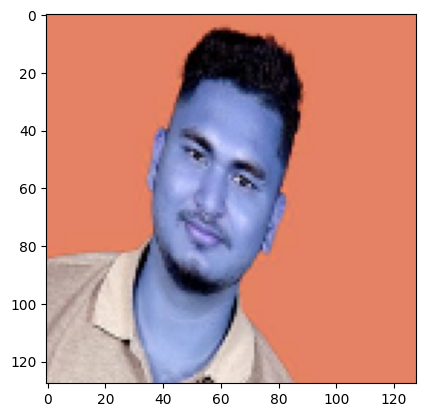

In [140]:
plt.imshow(each_iterImg[100])

In [141]:
initialTrain.shape,predecTrain.shape

((3025, 128, 128, 3), (3025,))

In [142]:
num_classes = len(np.unique(each_iterLab))
num_classes

15

In [143]:
predecTrain.shape

(3025,)

In [144]:
def beginCreationModel():
  facialAttentionModel = Sequential()

  facialAttentionModel.add(Conv2D(32,(4,4),padding='same',activation='relu',input_shape=(128,128,3)))
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.1))

  facialAttentionModel.add(Conv2D(64,(4,4),padding='same',activation='relu'))
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.1))

  facialAttentionModel.add(Conv2D(128,(4,4),padding='same',activation='relu'))
  facialAttentionModel.add(MaxPooling2D(pool_size=(3, 3)))
  facialAttentionModel.add(Dropout(0.1))


  facialAttentionModel.add(Flatten())


  facialAttentionModel.add(Dense(128,activation='relu'))

  facialAttentionModel.add(Dense(64,activation='relu'))

  facialAttentionModel.add(Dense(16,activation='relu'))

  facialAttentionModel.add(Dense(32,activation='softmax'))

  facialAttentionModel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return facialAttentionModel

In [145]:
facialAttentionModel = beginCreationModel()

In [146]:
facialAttentionModel.fit(initialTrain,predecTrain,validation_split=0.25,epochs=12)

Epoch 1/12
71/71 [==============================] - 5s 34ms/step - loss: 2.9869 - accuracy: 0.1737 - val_loss: 2.3935 - val_accuracy: 0.2272
Epoch 2/12
71/71 [==============================] - 2s 22ms/step - loss: 1.6340 - accuracy: 0.4647 - val_loss: 1.2233 - val_accuracy: 0.5112
Epoch 3/12
71/71 [==============================] - 2s 22ms/step - loss: 0.6600 - accuracy: 0.7840 - val_loss: 0.4853 - val_accuracy: 0.8243
Epoch 4/12
71/71 [==============================] - 2s 23ms/step - loss: 0.2165 - accuracy: 0.9374 - val_loss: 0.1255 - val_accuracy: 0.9762
Epoch 5/12
71/71 [==============================] - 1s 20ms/step - loss: 0.1164 - accuracy: 0.9603 - val_loss: 0.1141 - val_accuracy: 0.9643
Epoch 6/12
71/71 [==============================] - 2s 24ms/step - loss: 0.0727 - accuracy: 0.9771 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 7/12
71/71 [==============================] - 2s 25ms/step - loss: 0.0125 - accuracy: 0.9982 - val_loss: 0.0397 - val_accuracy: 0.9921
Epoch 8/12
71

In [147]:
def extractPastLabel(titleLable,pretransformLabel,each_iterLab):

  for i in range(len(pretransformLabel)):
    titleLable[pretransformLabel[i]] = each_iterLab[i]

  return titleLable
titleLable = {}
extractPastLabel(titleLable,tranmigateLab,each_iterLab)
print(titleLable)

{'STCS0010': 2, 'STCS0011': 3, 'STCS0012': 4, 'STCS0013': 5, 'STCS0014': 6, 'STCS005': 10, 'STCS006': 11, 'STCS007': 12, 'STCS008': 13, 'STCS009': 14, 'STCS002': 7, 'STCS003': 8, 'STCS004': 9, 'Nischal': 0, 'STCS001': 1}


In [148]:
p = initialTest[90].reshape(-1,128,128,3)

In [149]:
prediction = facialAttentionModel.predict(p)

1/1 [==============================] - 0s 89ms/step


In [150]:
predecTest[100]


4

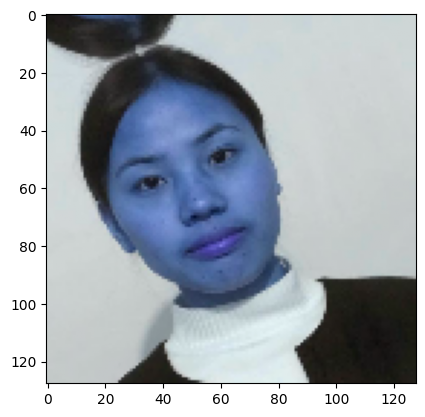

In [151]:
plt.imshow(initialTest[120])

In [152]:
np.argmax(prediction)

5

In [157]:
# Load and preprocess the image
testerPath = '/content/drive/MyDrive/AttendanceModel/data/Nischal/Nischal$2$4.jpg'
testingImg = cv2.imread(testerPath)
transformedProcessedImg = cv2.resize(testingImg, (128, 128))
processedImg = transformedProcessedImg / 255.0
processedImg  = np.expand_dims(processedImg , axis=0)

# Predict the label
findPrStudent = facialAttentionModel.predict(processedImg)
indexPredicted = np.argmax(findPrStudent)
labelPredicted = lablEncAbler.inverse_transform([indexPredicted])[0]

print(labelPredicted)

1/1 [==============================] - 0s 20ms/step
STCS0014


In [ ]:
facialAttentionModel.save('/content/drive/MyDrive/AttendanceModel/AiModel.h5')

In [ ]:
encoder_path = '/content/drive/MyDrive/AttendanceModel/encoder.pkl'
with open(encoder_path, 'wb') as file:
    pickle.dump(lablEncAbler, file)